# Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from collections import Counter
nltk.download('punkt')


df = pd.read_csv('/content/drive/MyDrive/TCC/TCC_results/Billboard_Hot100_Songs_with_Sentiment_All_Decades.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
sns.set(style="whitegrid")

# Visualização da quantidade de músicas por década

<ipython-input-3-5ece603eb9ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index, y=decade_counts.values, palette='viridis')


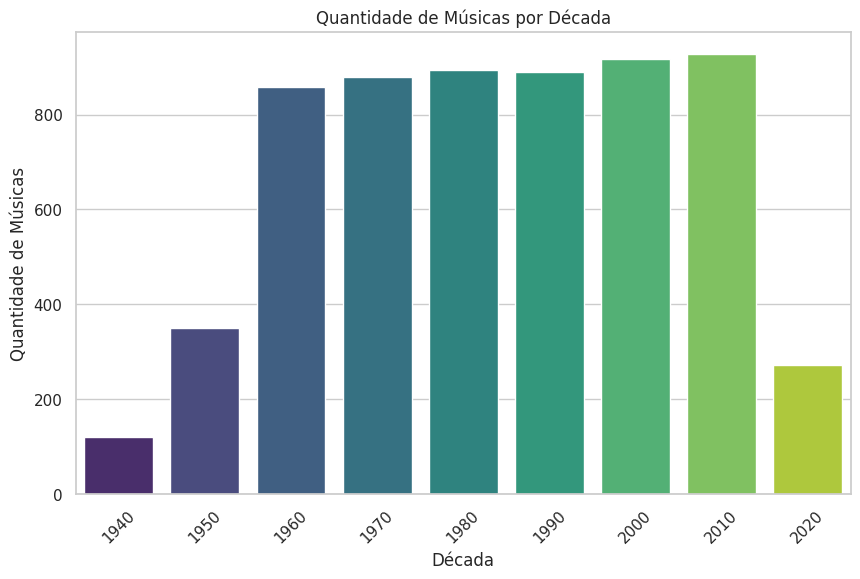

In [ ]:
decade_counts = df['Decade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette='viridis')

plt.title('Quantidade de Músicas por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Músicas')
plt.xticks(rotation=45)
plt.show()

# Visualização dos 20 gêneros mais comuns

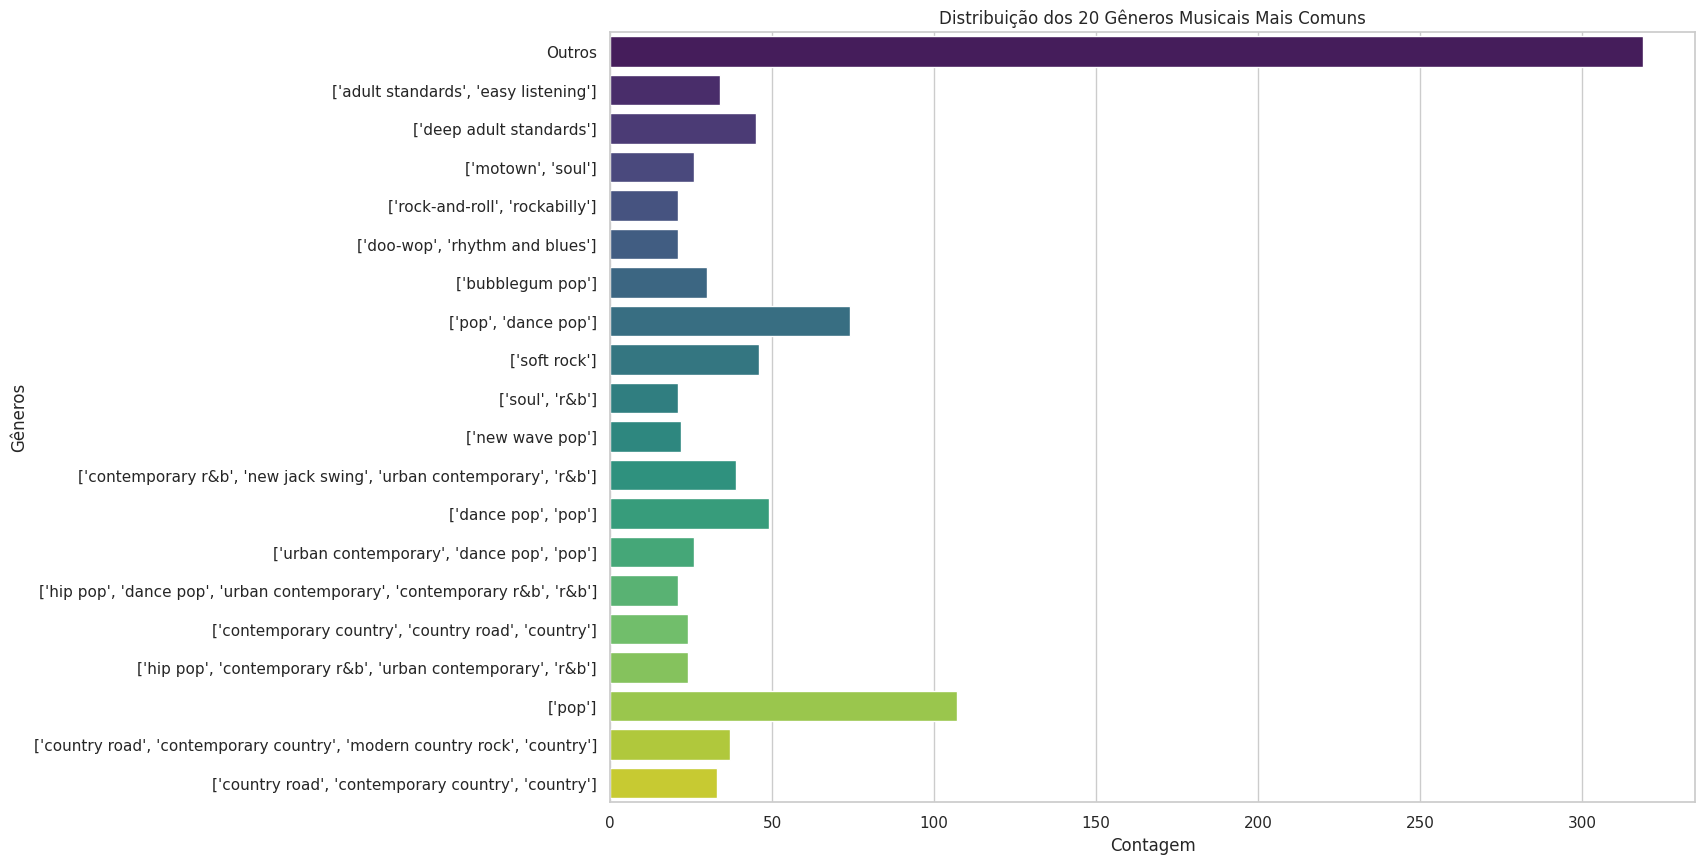

In [ ]:
# Substituir valores vazios ou listas vazias por "Outros"
df['Artist(s) Genres'] = df['Artist(s) Genres'].apply(lambda x: "Outros" if pd.isna(x) or x == "[]" else x)

# Filtrar os 20 gêneros mais comuns, incluindo "Outros"
top_genres = df['Artist(s) Genres'].value_counts().nlargest(20).index

plt.figure(figsize=(14, 10))
sns.countplot(y='Artist(s) Genres', data=df[df['Artist(s) Genres'].isin(top_genres)], hue='Artist(s) Genres', palette='viridis', dodge=False, legend=False)
plt.title('Distribuição dos 20 Gêneros Musicais Mais Comuns')
plt.xlabel('Contagem')
plt.ylabel('Gêneros')
plt.show()

# Visualização de Dispersão de Contagem de Músicas e Popularidade Média por gênero

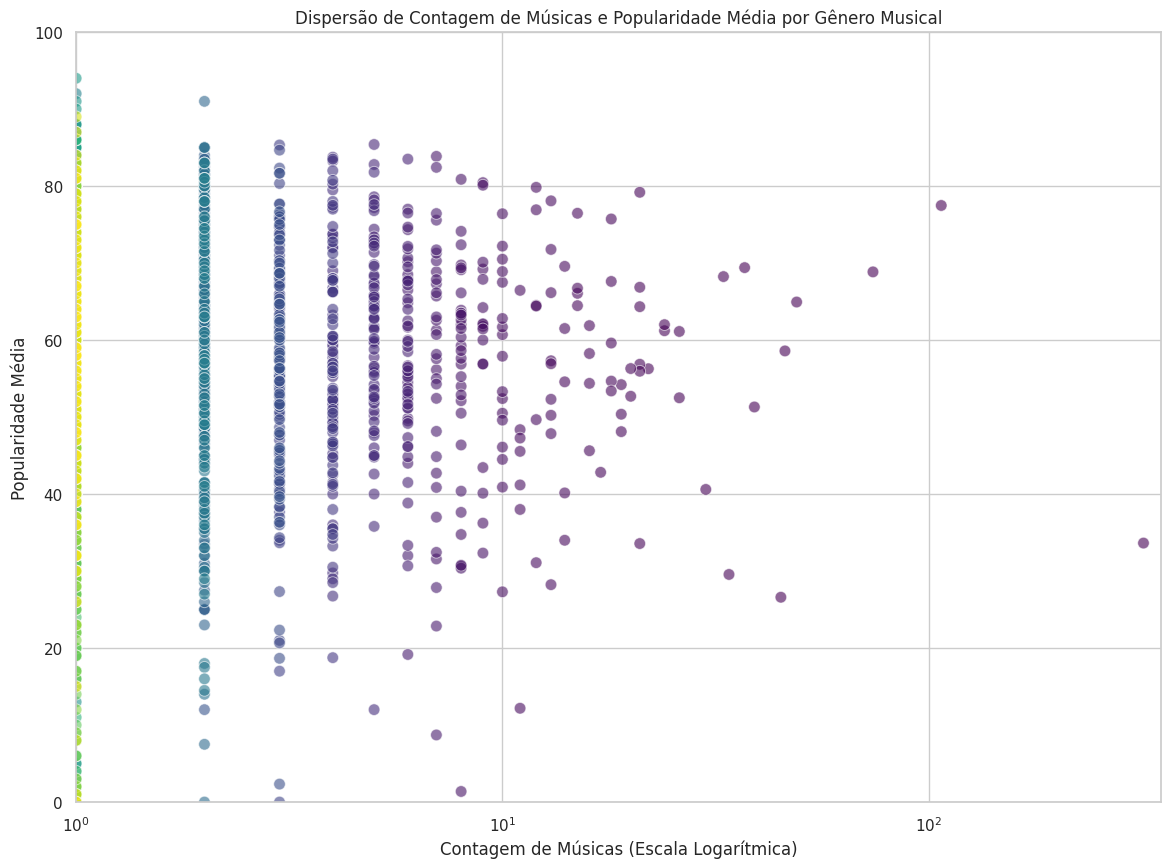

In [ ]:
plt.figure(figsize=(14, 10))

genre_count = df['Artist(s) Genres'].value_counts()

# Calculando a popularidade média por gênero
average_popularity = df.groupby('Artist(s) Genres')['Popularity'].mean()

scatter_data = pd.DataFrame({
    'Gênero Musical': genre_count.index,
    'Contagem de Músicas': genre_count.values,
    'Popularidade Média': average_popularity[genre_count.index].values
})

# Usando escala logarítmica para o eixo X
sns.scatterplot(
    data=scatter_data,
    x='Contagem de Músicas',
    y='Popularidade Média',
    hue='Gênero Musical',
    s=70,
    alpha=0.6,
    palette='viridis',
    legend=False
)

# Aplicando escala logarítmica no eixo X para melhor visualização
plt.xscale('log')

plt.xlim(1, scatter_data['Contagem de Músicas'].max()*1.1)
plt.ylim(0, 100)

plt.title('Dispersão de Contagem de Músicas e Popularidade Média por Gênero Musical')
plt.xlabel('Contagem de Músicas (Escala Logarítmica)')
plt.ylabel('Popularidade Média')
plt.show()

# Variação do Sentimento ao longo das dècadas.

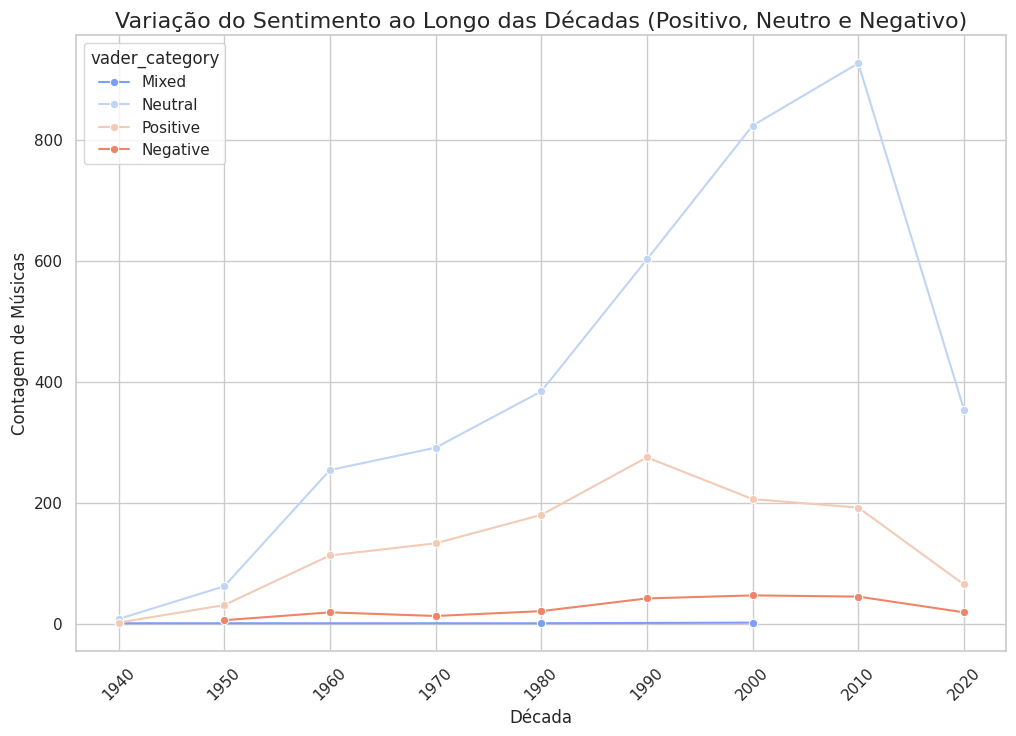

In [ ]:
df['Year'] = df['Album Release Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10

# Filtrar para incluir apenas décadas a partir de 1940
df_filtered = df[df['Decade'] >= 1940]

sentiment_by_decade = df_filtered.groupby(['Decade', 'vader_category']).size().reset_index(name='count')

# Configurar o gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(x='Decade', y='count', hue='vader_category', data=sentiment_by_decade, marker='o', palette='coolwarm')

plt.title('Variação do Sentimento ao Longo das Décadas (Positivo, Neutro e Negativo)', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Contagem de Músicas', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()

# Visualização da comparação de sentimento por gênero musical

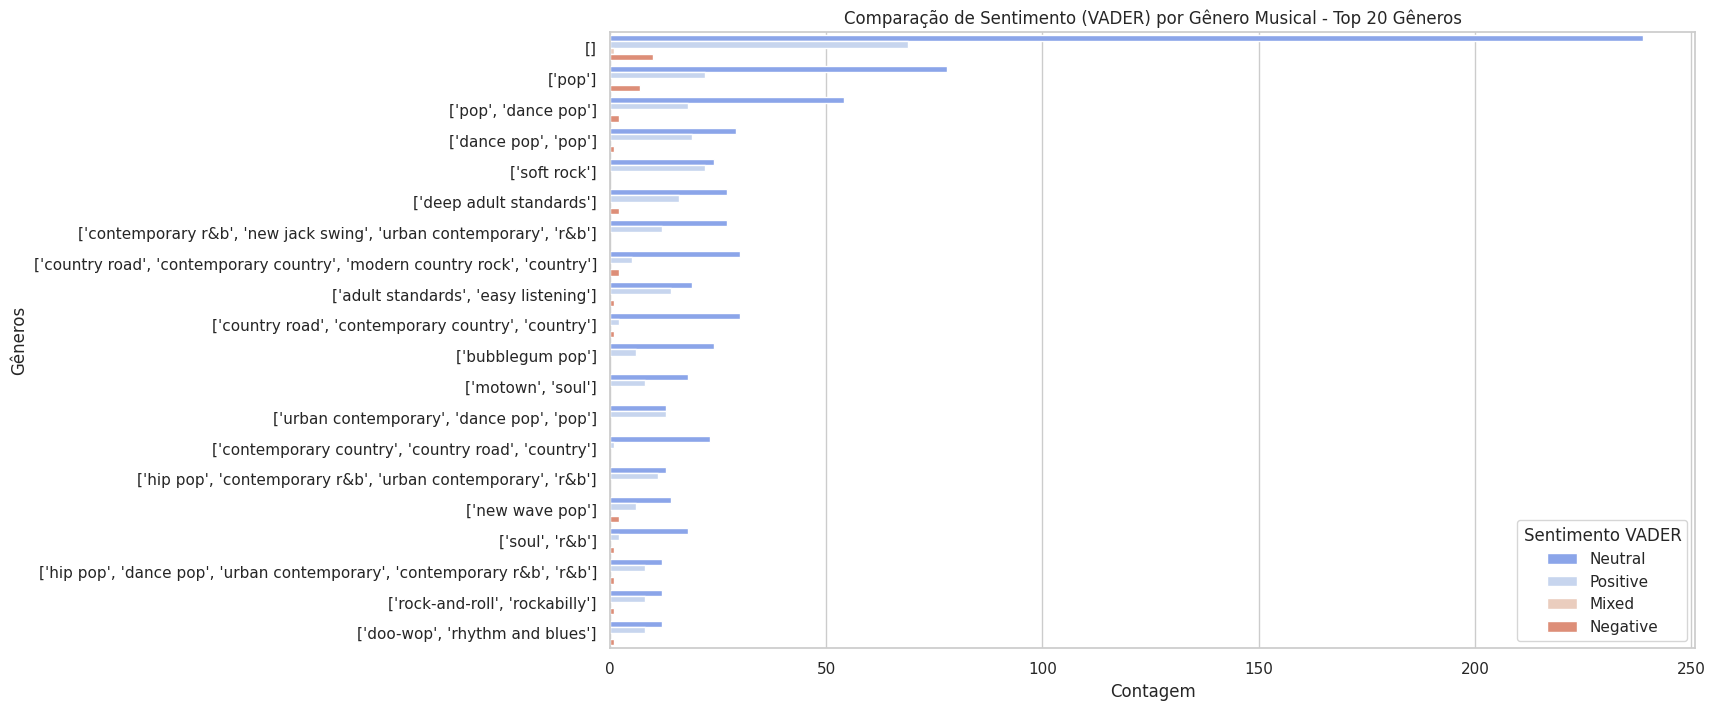

In [ ]:
top_genres = df['Artist(s) Genres'].value_counts().nlargest(20).index

plt.figure(figsize=(14, 8))
sns.countplot(y='Artist(s) Genres', hue='vader_category', data=df[df['Artist(s) Genres'].isin(top_genres)], palette='coolwarm', order=top_genres)
plt.title('Comparação de Sentimento (VADER) por Gênero Musical - Top 20 Gêneros')
plt.xlabel('Contagem')
plt.ylabel('Gêneros')
plt.legend(title='Sentimento VADER')
plt.show()

# Visualização da distribuição da popularidade das músicas

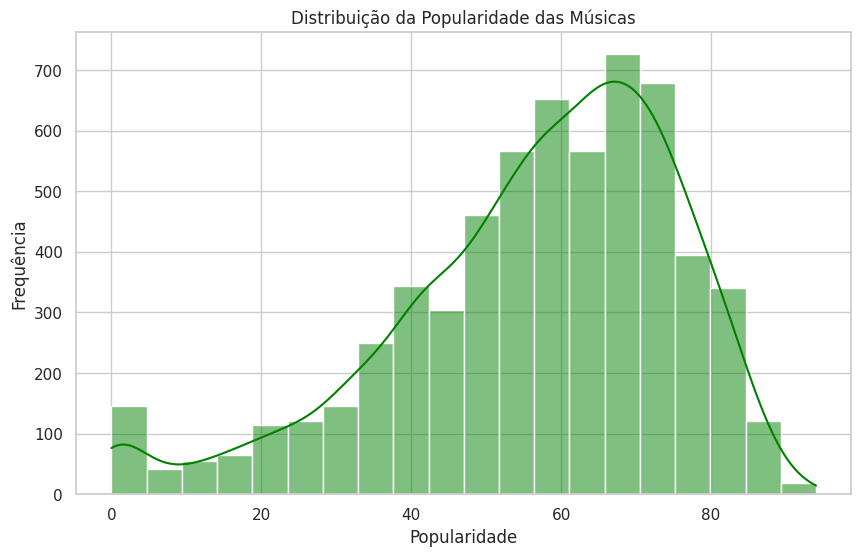

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='green')
plt.title('Distribuição da Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()

# Visualização da popularidade média por país

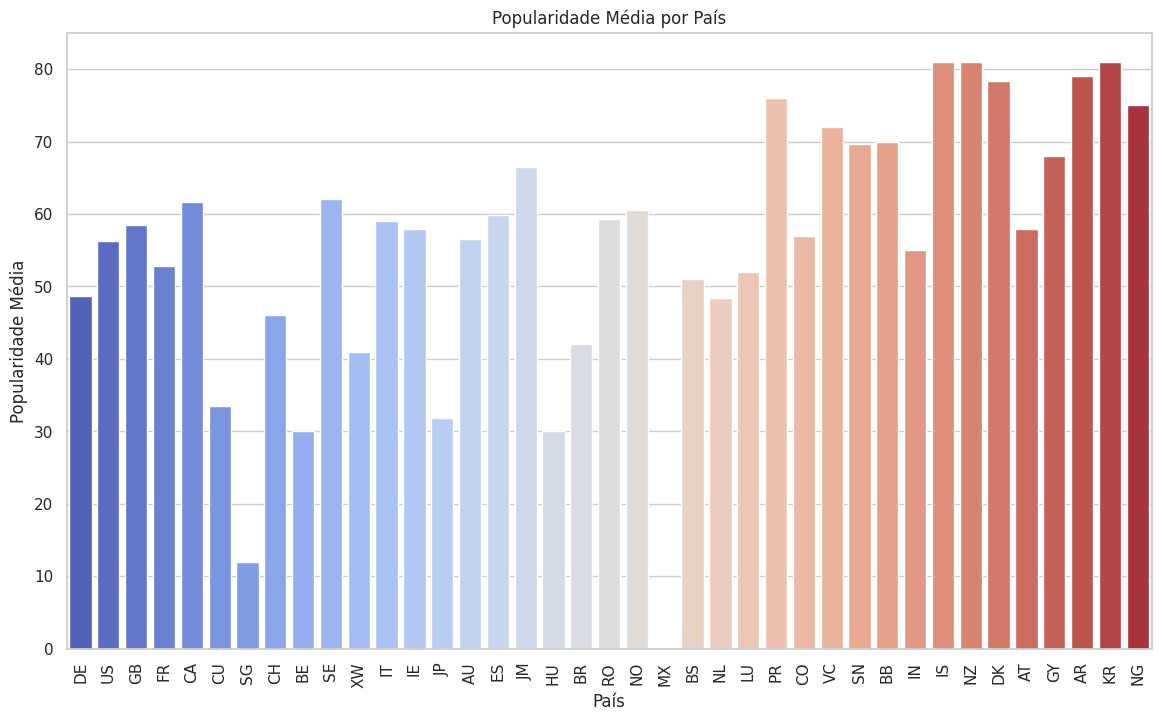

In [ ]:
df_filtered = df[df['País'] != 'Desconhecido']

plt.figure(figsize=(14, 8))
sns.barplot(x='País', y='Popularity', data=df_filtered, estimator=np.mean, errorbar=None, hue='País', dodge=False, palette='coolwarm', legend=False)
plt.title('Popularidade Média por País')
plt.xlabel('País')
plt.ylabel('Popularidade Média')
plt.xticks(rotation=90)
plt.show()

# Visualização do número de artistas por país

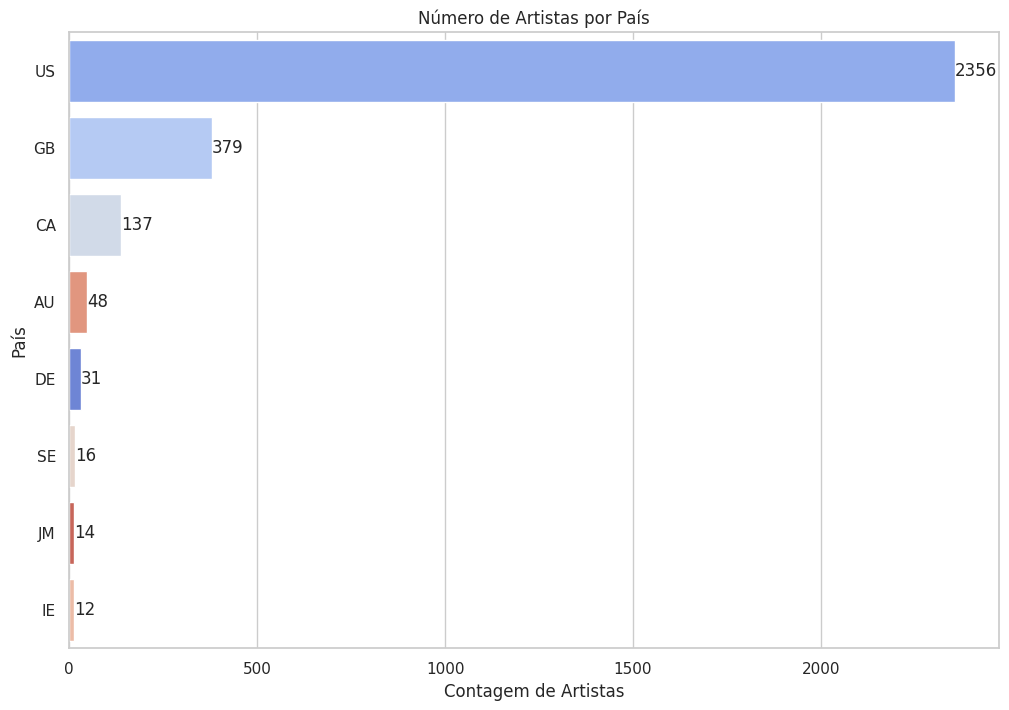

In [ ]:
df_filtered = df[(df['País'] != 'Desconhecido') & (df['País'].map(df['País'].value_counts()) > 10)]

plt.figure(figsize=(12, 8))

sns.countplot(y='País', hue='País', data=df_filtered, order=df_filtered['País'].value_counts().index, palette='coolwarm', dodge=False, legend=False)

plt.title('Número de Artistas por País')
plt.xlabel('Contagem de Artistas')
plt.ylabel('País')

for index, value in enumerate(df_filtered['País'].value_counts()):
    plt.text(value, index, f'{value}', va='center')

plt.show()

# Visualização do sentimento médio por país

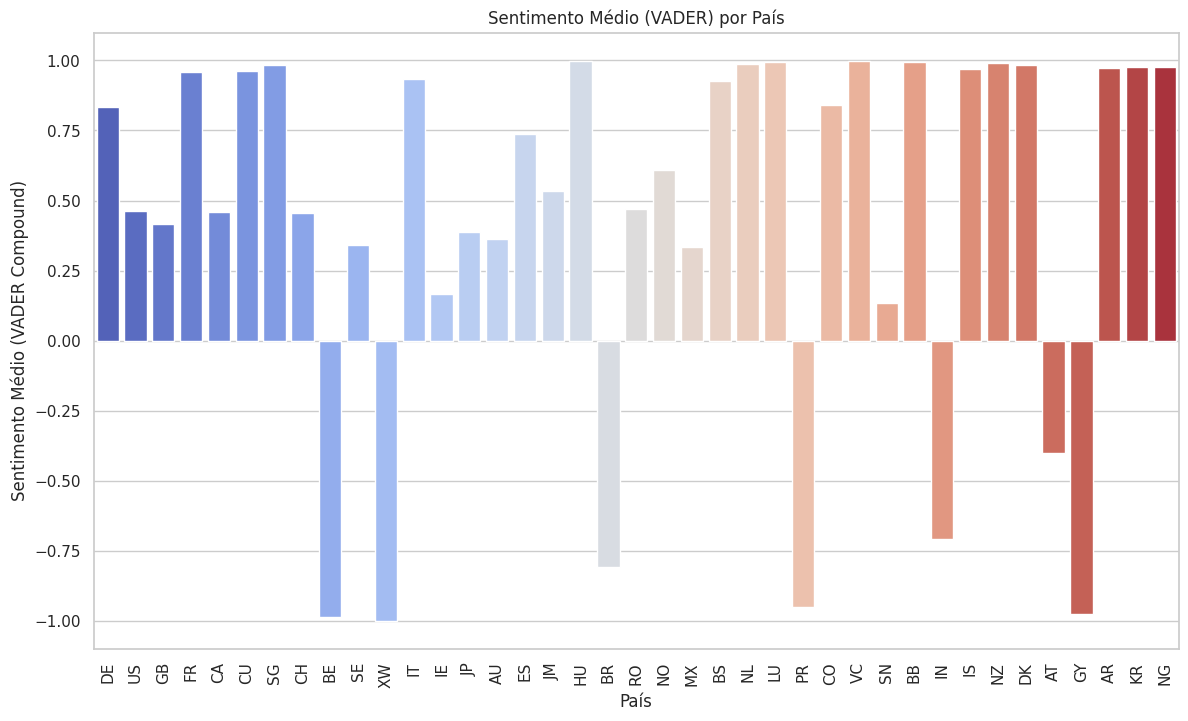

In [ ]:
df_filtered = df[df['País'] != 'Desconhecido']

plt.figure(figsize=(14, 8))

sns.barplot(x='País', y='vader_compound', data=df_filtered, estimator=np.mean, errorbar=None, hue='País', palette='coolwarm', dodge=False, legend=False)

plt.title('Sentimento Médio (VADER) por País')
plt.xlabel('País')
plt.ylabel('Sentimento Médio (VADER Compound)')
plt.xticks(rotation=90)
plt.show()
